Welcome to the Artifact coding challenge ! We hope you'll have fun and wish you best of luck 😀

Albert and the ear shells
=========================

![natural-iridescent-abalone-shell.png](natural-iridescent-abalone-shell.png)

Ear shells, also known as abalone, are marine snails.

The age of ear shells can be determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope - a boring and time-consuming task. 

**Albert**, a scientist and **ear shells** specialist, needs your help. He has collected data on his favorite sea creature and asks you to help him understand it. Then, he would like you to develop a model to predict the age of ear shells using other measurements which are easier to obtain. 

# Part 0: Setup

Please include any setup code (including imports) in this section

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Part 1: Data understanding

## Loading, processing and exploring data

Albert has provided you the dataset `earshells.csv`. Please load it and do what every diligent Data Scientist should do when received a new dataset !

In [2]:
df = pd.read_csv('earshells.csv') #Reading the dataframe
print(df.head(10)) #Show first 10 results to visuilize data
print(df.describe(include='all')) #Statistic
print(df.info()) #general info

  subset sex    length  diameter    height  weight_whole  weight_shucked  \
0  train   I  0.349544  0.260194  0.074504      0.179963        0.089707   
1  train   F  0.545249  0.439866  0.134915      0.918132        0.428983   
2   test   F  0.649654  0.544545  0.175080      1.524459        0.590134   
3  train   I  0.500003  0.394566  0.140912      0.621133        0.292336   
4  train   I  0.439268  0.335001  0.110040      0.389429        0.175157   
5  train   I  0.294596  0.220013  0.084899      0.129350        0.058167   
6  train   I  0.475259  0.364612  0.120313      0.518502        0.268031   
7  train   M  0.549885  0.451143  0.149154      1.014219        0.407824   
8  train   I  0.464834  0.355262  0.119326      0.580638        0.254973   
9   test   I  0.379859  0.290154  0.100127      0.236797        0.107936   

   weight_viscera  weight_shell  rings      price  
0        0.024760      0.054516    5.0   1.205721  
1        0.201751      0.237840   10.0  18.403463  
2      

From that we see: 
1) First 2 columns are not numeric values (Have to encode them);<br>
2) Total number of rows 3174. In last 2 columns we have a missing data (Have to deal with it);<br>
3) We have already data are split into training and test sets? (Values of 1st column. Have to form tests by this rule);<br> 
4) Other statistical info.<br>

### Dealing with missing data

<i>Here I will replace missing data in all columns with numeric values (from 2 to last) with a mean value calculated for each column. Using <b>SimpleImputer</b> from <b>sklearn</b> library.</i>

In [3]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df.iloc[:, 2:len(df.columns)])
df.iloc[:, 2:len(df.columns)] = imputer.transform(df.iloc[:, 2:len(df.columns)])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subset          3174 non-null   object 
 1   sex             3174 non-null   object 
 2   length          3174 non-null   float64
 3   diameter        3174 non-null   float64
 4   height          3174 non-null   float64
 5   weight_whole    3174 non-null   float64
 6   weight_shucked  3174 non-null   float64
 7   weight_viscera  3174 non-null   float64
 8   weight_shell    3174 non-null   float64
 9   rings           3174 non-null   float64
 10  price           3174 non-null   float64
dtypes: float64(9), object(2)
memory usage: 272.9+ KB


### Dividing to subsets

<i>In this chapter I divide dataframe onto training and test subsets of independent (X) variables and dependent (y). In feature frame (X) after dividing I got rid out of "subset" column.</i>

In [4]:
grouped = df.groupby(df.subset)
df_train = grouped.get_group('train')
df_test = grouped.get_group('test')
X_train = df_train.iloc[:,1:-1].values
X_test = df_test.iloc[:,1:-1].values
y_train = df_train.iloc[:, -1].values
y_test = df_test.iloc[:, -1].values
total = len(X_train)+len(X_test)
print(total)
print(X_train)

3174
[['I' 0.3495442836075593 0.2601940906334086 ... 0.0247599507832135
  0.0545161929959864 5.0]
 ['F' 0.5452490400598211 0.4398656370726855 ... 0.2017510973532418
  0.2378398030284065 10.0]
 ['I' 0.5000031723831203 0.3945664355082028 ... 0.1201647205750157
  0.1954293870087821 9.0]
 ...
 ['I' 0.3450474020089475 0.2553387214243274 ... 0.0363349303647198
  0.0553393824263176 6.0]
 ['M' 0.749726251499644 0.5547359557667633 ... 0.5223463012914071
  0.5278917571509596 11.0]
 ['F' 0.7201674037615454 0.5506174994453702 ... 0.3250788916683267
  0.4348239342922483 10.0]]


### Encoding the categorical data

<i>Here I am encoding the sex column by <b>OneHotEncoder</b> from the <b>sci-kit learn</b> library. As we can see there are 3 different values of "sex" parameter encoded into 3 columns.</i> 

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
print(X_train)
X_test = np.array(ct.fit_transform(X_test))
print(X_test)

[[0.0 1.0 0.0 ... 0.0247599507832135 0.0545161929959864 5.0]
 [1.0 0.0 0.0 ... 0.2017510973532418 0.2378398030284065 10.0]
 [0.0 1.0 0.0 ... 0.1201647205750157 0.1954293870087821 9.0]
 ...
 [0.0 1.0 0.0 ... 0.0363349303647198 0.0553393824263176 6.0]
 [0.0 0.0 1.0 ... 0.5223463012914071 0.5278917571509596 11.0]
 [1.0 0.0 0.0 ... 0.3250788916683267 0.4348239342922483 10.0]]
[[1.0 0.0 0.0 ... 0.3259701403307138 0.4955058887031087 10.0]
 [0.0 1.0 0.0 ... 0.0398381866156518 0.0821997873194008 6.0]
 [0.0 1.0 0.0 ... 0.1412284656040897 0.1199518030325547 9.0]
 ...
 [0.0 1.0 0.0 ... 0.0176725751633301 0.0252668992742599 7.0]
 [1.0 0.0 0.0 ... 0.308514168254535 0.4046327094806584 11.0]
 [0.0 0.0 1.0 ... 0.1971943616800289 0.2749568773220962 10.0]]


### Feature scaling

<i>Here I am scaling features in columns from "length" to "rings". Actually, from the data analysis in 3.1, it is seems for me that I can scale only "rings" column, others are ok.</i>

In [6]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
X_train[:, 3:] = scX.fit_transform(X_train[:, 3:])
X_test[:, 3:] = scX.transform(X_test[:, 3:])
print(X_train)
print(X_test)

[[0.0 1.0 0.0 ... -1.0595108777028999 -1.1881799433271185
  -2.242383689900623]
 [1.0 0.0 0.0 ... 0.21505263117063042 0.1635773530936 0.7982002323911073]
 [0.0 1.0 0.0 ... -0.3724740371285111 -0.14914062845076875
  0.19008344793276122]
 ...
 [0.0 1.0 0.0 ... -0.9761561626425794 -1.182110063301355
  -1.634266905442277]
 [0.0 0.0 1.0 ... 2.5237497382193097 2.302308121361314 1.4063170168494534]
 [1.0 0.0 0.0 ... 1.1031711009929288 1.6160620421519545
  0.7982002323911073]]
[[1.0 0.0 0.0 ... 1.1095892357099753 2.0635072709549647
  0.7982002323911073]
 [0.0 1.0 0.0 ... -0.9509282195154674 -0.9840518410537195
  -1.634266905442277]
 [0.0 1.0 0.0 ... -0.22078802743507364 -0.7056830991016017
  0.19008344793276122]
 ...
 [0.0 1.0 0.0 ... -1.1105490822337079 -1.403852906545028
  -1.026150120983931]
 [1.0 0.0 0.0 ... 0.9838838235954211 1.3934436439013005
  1.4063170168494534]
 [0.0 0.0 1.0 ... 0.18223828355374855 0.4372642829408359
  0.7982002323911073]]


## Questions

Albert needs your help getting a deeper understanding of one particular aspect of this data: the price of ear shells. Can you help him ?

### Question 1.1

What's the **average price** for ear shells with a **diameter** falling outside the interquartile range (of diameter) ?

<i>Interquartile range is Q3-Q1, therefore we are looking for values of diameter less than Q1 and higher than Q3.</i> 

In [7]:
q1 = df['diameter'].quantile(q=0.25)
q3 = df['diameter'].quantile(q=0.75)
numb = 0
t_sum = 0
for i in range(0, len(df)):
    if (df.iloc[i, 3] < q1 or df.iloc[i, 3] > q3):
         t_sum += df.iloc[i, 10]
         numb += 1
print('The avarage price for ear shells outside the interquartile range of diameter is {:.2f} '.format(t_sum/numb))

The avarage price for ear shells outside the interquartile range of diameter is 13.09 


### Question 1.2

Albert would like to understand which factors / attributes have been used to determine the price. Please provide him with **one clear visualization** which explicits the dependency between the price and the most relevant attributes.

<i>Wow, that was a bit hard part and I think, here I need to practice more. I got scores for each feature in <b>SelectKBest</b> method for <b>f_regression</b> function. From the bar plot I can tell that we should concentrate only on 2, maximum 3, values with a highest score.</i>

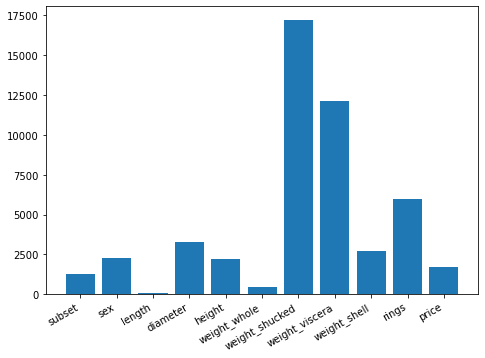

In [8]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
select = SelectKBest(score_func=f_regression, k='all')
z = select.fit(X_train, y_train)
scores = pd.DataFrame(z.scores_)
#print(scores)
x1=df.columns.values.tolist()
y1=scores.iloc[:,-1].tolist()
#print(x1, y1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x1,y1)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

# Part 2: Modeling

Albert loves ML ! He asks you to use your ML skills to train a model that will predict the **number of rings** based on the other attributes.

Albert was kind enough to pre-assign the dataset samples to train-test with the `subset` attribute. `test` samples should obviously not be used during the training procedure !

### Question 2.1

Which model will you choose to accomplish this task? Briefly explain why.

<i>While we are looking for prediction of continuous numeric value, we are aiming for some sort of regression. I guess it is better to try different and choose the best. But, before, I have to slightly modify training and test sets to make the <b>number of rings</b> a target</i>

In [9]:
X_train = df_train.iloc[:,6:7].values
X_test = df_test.iloc[:,6:7].values
y_train = df_train.iloc[:, 9].values
y_test = df_test.iloc[:, 9].values

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluating the Model Performance
from sklearn.metrics import r2_score
print('Multiple linear regression accuracy is {:.2f} %'.format(r2_score(y_test, y_pred)*100))

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

# Predicting the Test set results
y_pred = regressor.predict(poly_reg.transform(X_test))

# Evaluating the Model Performance
from sklearn.metrics import r2_score
print('Polynomial regression accuracy is {:.2f} %'.format(r2_score(y_test, y_pred)*100))

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluating the Model Performance
from sklearn.metrics import r2_score
print('Random forest regression accuracy is {:.2f} %'.format(r2_score(y_test, y_pred)*100))

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluating the Model Performance
from sklearn.metrics import r2_score
print('Decision tree regression accuracy is {:.2f} %'.format(r2_score(y_test, y_pred)*100))

from xgboost import XGBRegressor
classifier = XGBRegressor()
classifier.fit(X_train, y_train)

from sklearn.metrics import r2_score
y_pred = classifier.predict(X_test)

from sklearn.metrics import r2_score
print('XGBoost accuracy is {:.2f} %'.format(r2_score(y_test, y_pred)*100))

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train.reshape(-1,1))

# Training the SVR model on the Training set
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))

# Evaluating the Model Performance
from sklearn.metrics import r2_score
print('SVR accuracy is {:.2f} %'.format(r2_score(y_test, y_pred)*100))

Multiple linear regression accuracy is 29.07 %
Polynomial regression accuracy is 35.85 %
Random forest regression accuracy is 17.36 %
Decision tree regression accuracy is -13.42 %
XGBoost accuracy is 31.67 %


C:\Users\Yehor\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR accuracy is 34.07 %


<i>In this case I would like to add back features and rechek</i>

In [10]:
X_train = df_train.iloc[:,1:9].values
X_test = df_test.iloc[:,1:9].values
y_train = df_train.iloc[:, 9].values
y_test = df_test.iloc[:, 9].values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.fit_transform(X_test))

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluating the Model Performance
from sklearn.metrics import r2_score
print('Multiple linear regression accuracy is {:.2f} %'.format(r2_score(y_test, y_pred)*100))

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 1)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

# Predicting the Test set results
y_pred = regressor.predict(poly_reg.transform(X_test))

# Evaluating the Model Performance
from sklearn.metrics import r2_score
print('Polynomial regression accuracy is {:.2f} %'.format(r2_score(y_test, y_pred)*100))
# CHANGING DEGREE IN POLYNOMIAL REGRESSION SHOWS THAT TREND IS LINEAR

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluating the Model Performance
from sklearn.metrics import r2_score
print('Random forest regression accuracy is {:.2f} %'.format(r2_score(y_test, y_pred)*100))

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluating the Model Performance
from sklearn.metrics import r2_score
print('Decision tree regression accuracy is {:.2f} %'.format(r2_score(y_test, y_pred)*100))

from xgboost import XGBRegressor
classifier = XGBRegressor()
classifier.fit(X_train, y_train)

from sklearn.metrics import r2_score
y_pred = classifier.predict(X_test)

from sklearn.metrics import r2_score
print('XGBoost accuracy is {:.2f} %'.format(r2_score(y_test, y_pred)*100))

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train.reshape(-1,1))

# Training the SVR model on the Training set
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))

# Evaluating the Model Performance
from sklearn.metrics import r2_score
print('SVR accuracy is {:.2f} %'.format(r2_score(y_test, y_pred)*100))

Multiple linear regression accuracy is 46.74 %
Polynomial regression accuracy is 46.69 %
Random forest regression accuracy is 56.45 %
Decision tree regression accuracy is 20.47 %
XGBoost accuracy is 50.69 %


C:\Users\Yehor\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR accuracy is 56.91 %


In [18]:
X_train = df_train.iloc[:,1:9].values
X_test = df_test.iloc[:,1:9].values
y_train = df_train.iloc[:, 9].values
y_test = df_test.iloc[:, 9].values


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.fit_transform(X_test))

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train.reshape(-1,1))
X_test = sc_X.transform(X_test)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = sc_y.inverse_transform(regressor.predict(X_test))

# Evaluating the Model Performance
from sklearn.metrics import r2_score
print('Multiple linear regression accuracy is {:.2f} %'.format(r2_score(y_test, y_pred)*100))


# CHANGING DEGREE IN POLYNOMIAL REGRESSION SHOWS THAT TREND IS LINEAR

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = sc_y.inverse_transform([regressor.predict(X_test)]).ravel()

# Evaluating the Model Performance
from sklearn.metrics import r2_score
print('Random forest regression accuracy is {:.2f} %'.format(r2_score(y_test, y_pred)*100))

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = sc_y.inverse_transform([regressor.predict(X_test)]).ravel()

# Evaluating the Model Performance
from sklearn.metrics import r2_score
print('Decision tree regression accuracy is {:.2f} %'.format(r2_score(y_test, y_pred)*100))

from xgboost import XGBRegressor
classifier = XGBRegressor()
classifier.fit(X_train, y_train)

from sklearn.metrics import r2_score
y_pred = classifier.predict(X_test)

from sklearn.metrics import r2_score
print('XGBoost accuracy is {:.2f} %'.format(r2_score(y_test, y_pred)*100))

# Training the SVR model on the Training set
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = sc_y.inverse_transform([regressor.predict(X_test)]).ravel()

# Evaluating the Model Performance
from sklearn.metrics import r2_score
print('SVR accuracy is {:.2f} %'.format(r2_score(y_test, y_pred)*100))

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 1)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

# Predicting the Test set results
y_pred = sc_y.inverse_transform(regressor.predict(poly_reg.transform(X_test)))

# Evaluating the Model Performance
from sklearn.metrics import r2_score
print('Polynomial regression accuracy is {:.2f} %'.format(r2_score(y_test, y_pred)*100))

Multiple linear regression accuracy is 46.64 %


C:\Users\Yehor\AppData\Local\Temp\ipykernel_15584\2091153119.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


Random forest regression accuracy is 56.79 %
Decision tree regression accuracy is 21.01 %
XGBoost accuracy is -2754.06 %


C:\Users\Yehor\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR accuracy is 56.91 %
Polynomial regression accuracy is 46.76 %


<i>With all features accuracy is higher, maybe, we should carefully specify valuable features. Next step is Grid search for better parameters of the regression models</i>

### Question 2.2

Which metric would you choose to communicate the performance of your model to Albert ? Briefly explain why

<i><b>r square metrics</b> describes how model fits a dataset</i>

### Question 2.3

How's your model performing ? Please provide the value of your chosen metric on the **test set** and briefly discuss it

<i>Not so good. The best <b>r square</b> parameters I have got for SVR and Random forest models, but they not higher 57%. I did't check for data that stand out the trend and did't do the parameters tune for each model </i>

# The end !

Thank you for participating in this challenge, we hope you enjoyed it !

Don't forget to submit your work by email, including a zip file with:
- your notebook `challenge.ipynb`
- an export of your notebook as HTML `challenge.html`
- an image of your visualization for question 1.2
- a `requirements.txt` file listing all the dependencies you have used